In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from teaspoon.parameter_selection.MI_delay import MI_for_delay
from teaspoon.parameter_selection.MsPE import MsPE_tau, MsPE_n
from teaspoon.parameter_selection.FNN_n import FNN_n

from nolds import lyap_r, lyap_e

import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

from nolitsa import data, dimension, utils

import re

In [66]:
df = pd.read_csv('sc_merge_min_6WdR366jgc_KP2.lst', sep="\s+")

In [2]:
df

3

In [68]:
df = df.replace({'Scalar_B':{9999.99:np.nan}, 'Flow_speed':{99999.9:np.nan},
                   'Proton_Density':{999.99:np.nan}, 'Temperature':{9999999.0:np.nan},
                'BX_GSE':{9999.99:np.nan}, 'BY_GSE':{9999.99:np.nan}, 'BZ_GSE':{9999.99:np.nan}, 
                 'BY_GSM':{9999.99:np.nan}, 'BZ_GSM':{9999.99:np.nan}, 'Vx':{99999.9:np.nan}, 
                 'Vy':{99999.9:np.nan}, 'Vz':{99999.9:np.nan}})
# df_X = df_X.to_numpy()
df.shape

(525600, 16)

In [5]:
df.columns

Index(['Year', 'Day', 'Hour', 'Minute', 'Scalar_B', 'BX_GSE', 'BY_GSE',
       'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'Flow_speed', 'Vx', 'Vy', 'Vz',
       'Proton_Density', 'Temperature'],
      dtype='object')

In [6]:
print(df['Scalar_B'].value_counts())
print(df['BZ_GSE'].value_counts())
print(df['Flow_speed'].value_counts())
print(df['Proton_Density'].value_counts())
print(df['Temperature'].value_counts())
# print(df['AE'].value_counts())
# print(df['AL'].value_counts())
# print(df['AU'].value_counts())

5.08     992
5.12     976
5.04     966
4.79     965
5.60     958
        ... 
20.23      1
21.11      1
21.44      1
29.02      1
0.36       1
Name: Scalar_B, Length: 2870, dtype: int64
 0.41     635
 0.33     635
-0.12     634
-0.68     631
 0.78     626
         ... 
 15.36      1
 15.31      1
 13.84      1
-13.10      1
-14.31      1
Name: BZ_GSE, Length: 3742, dtype: int64
336.5    328
337.4    328
337.8    313
340.1    307
330.8    305
        ... 
921.7      1
928.1      1
935.7      1
934.1      1
715.7      1
Name: Flow_speed, Length: 5418, dtype: int64
4.89     594
3.48     591
4.87     588
4.88     586
5.17     583
        ... 
33.95      1
36.51      1
37.14      1
37.43      1
26.35      1
Name: Proton_Density, Length: 3940, dtype: int64
59651.0     96
38359.0     95
42904.0     93
34935.0     91
24394.0     90
            ..
305494.0     1
237724.0     1
230595.0     1
239771.0     1
135200.0     1
Name: Temperature, Length: 108855, dtype: int64


In [7]:
Scalar_B = df['Scalar_B'].to_numpy()
BZ = df['BZ_GSE'].to_numpy()
Flow_speed = df['Flow_speed'].to_numpy()
Proton_Density = df['Proton_Density'].to_numpy()
Temperature = df['Temperature'].to_numpy()

In [70]:
ts = BZ

In [71]:
idxs_missing = np.argwhere(np.isnan(ts) == False).T[0]
idxs_missing

array([     0,      1,      2, ..., 525596, 525597, 525599])

In [72]:
np.isnan(ts)

array([False, False, False, ..., False,  True, False])

In [73]:
idx_diff_missing = idxs_missing[1:] - idxs_missing[:-1]
idx_diff_missing = idx_diff_missing - 1
idx_diff_missing_nz = idx_diff_missing[np.nonzero(idx_diff_missing)]
arr_index = np.nonzero(idx_diff_missing)

In [74]:
idx_diff_missing

array([0, 0, 0, ..., 0, 0, 1])

In [75]:
np.argwhere((idx_diff_missing <= 50) * (idx_diff_missing >= 1) != 0).T[0]

array([    72,     73,     74, ..., 441468, 441635, 441835])

Text(0, 0.5, 'Плотность протонов, $cm^{-3}$')

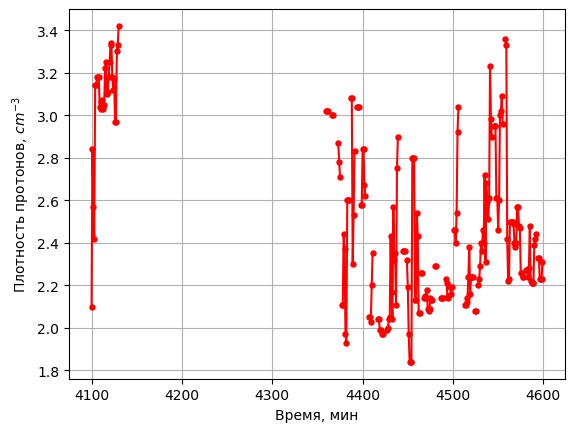

In [98]:
start = 4100
step = 500
plt.plot(df['Proton_Density'][start:start+step], 'ro-', markersize=3.6)
plt.grid()
plt.xlabel('Время, мин')
plt.ylabel(r'Плотность протонов, $cm^{-3}$')

In [76]:
hist_missing[0]

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    40,    41,    43,    47,    48,    49,
          62,    64,    69,    76,    95,   128,   143,   149,   162,
         166,   177,   182,   184,   202,   209,   211,   215,   216,
         221,   226,   229,   230,   233,   259,   282,   296,   381,
         436,   446,   488,   677,   931,   943,  1045,  1091, 50011])

In [77]:
hist_missing = np.unique(idx_diff_missing, return_counts=True)

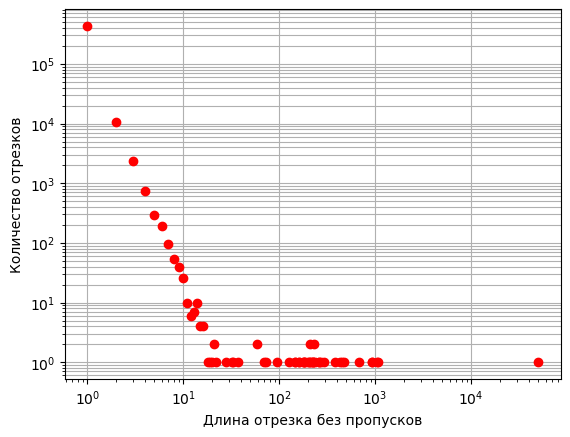

In [78]:
# plt.style.use('dark_background')
# plt.figure(figsize=(18,10))
plt.plot(hist_missing[0] + 1, hist_missing[1], 'ro')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.grid(b=True, which='both', axis='y')
# plt.xlim((0,200))
plt.xlabel('Длина отрезка без пропусков')
plt.ylabel('Количество отрезков')
plt.show()
plt.style.use('default')

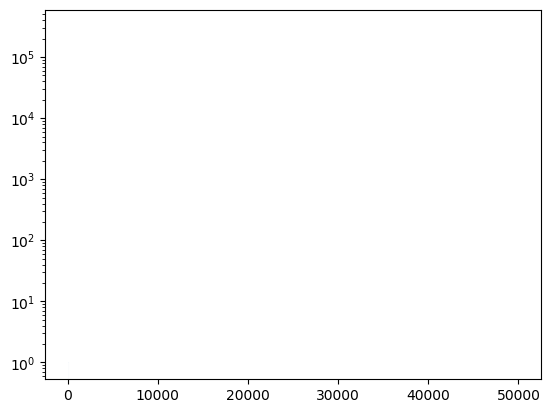

In [63]:
from teaspoon.parameter_selection.MI_delay import MI_for_delay

from nolds import lyap_r, lyap_e

from nolitsa import dimension

In [49]:
wh = np.argwhere(hist_missing[0] >= 10).T[0]

In [54]:
wh[5:6]

array([14])

In [52]:
np.sum(hist_missing[1][:9])

33741

In [53]:
np.sum(hist_missing[1][9:])

1207

In [79]:
hist_missing[1]

array([69994,  7450,  7139,  2329,  2378,  1929,  1451,  1220,  1061,
         849,   842,   714,   636,   618,   527,   465,   472,   398,
         387,   330,   290,   279,   225,   238,   195,   177,   183,
         152,   167,   130,   123,   116,   103,    95,    82,    95,
          79,    64,    60,    53,    50,    44,    49,    43,    39,
          38,    46,    34,    38,    22,    19,    27,    22,    24,
          17,    10,    12,    11,    21,    17,    17,    11,    14,
          11,     8,    12,     9,     7,     8,    12,    10,     5,
           4,     5,     8,     6,     6,     8,     6,     7,     2,
           1,     3,     2,     1,     1,     1,     2,     2,     1,
           3,     3,     1,     2,     3,     1,     2,     1,     2,
           2,     2,     3,     2,     4,     1,     1,     6,     2,
           1,     3,     2,     1,     1,     2,     5,     2,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,

In [12]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [ ]:
imp_mean = IterativeImputer(max_iter=3000, initial_strategy='most_frequent', 
                            tol=1e-4, estimator=DecisionTreeRegressor())
df_X_transformed = imp_mean.fit_transform(df_X)

In [ ]:
df_X

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df_X_transformed[:, 6], 'ro', markersize=2)
plt.plot(df_X[:, 6], 'bo', markersize=2)
# plt.xlim((100000, 102000))

In [53]:
df_X_transformed[1]

array([ 2.01400000e+03,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        5.03000000e+00, -1.21000000e+00,  4.00885514e+02,  4.88512140e+00,
        8.24000110e+04])

In [54]:
imp_mean.n_iter_

13

## Interpolation in `scipy`

In [9]:
df_X.head()

,Year,Day,Hour,Minute,Scalar_B,BZ,Flow_speed,Proton_Density,Temperature
0,2014,1,0,0,5.03,-1.22,NaN,NaN,NaN
1,2014,1,0,1,5.03,-1.21,NaN,NaN,NaN
2,2014,1,0,2,5.02,-1.18,NaN,NaN,NaN
3,2014,1,0,3,5.06,-1.52,NaN,NaN,NaN
4,2014,1,0,4,5.10,-1.43,386.2,6.29,109948.0


In [10]:
df_true_A = df_X.dropna(subset=['Flow_speed', 'Proton_Density', 'Temperature'])
df_true_B = df_X.dropna(subset=['Scalar_B', 'BZ'])

In [11]:
df_true_A

,Year,Day,Hour,Minute,Scalar_B,BZ,Flow_speed,Proton_Density,Temperature
4,2014,1,0,4,5.10,-1.43,386.2,6.29,109948.0
5,2014,1,0,5,4.99,-1.70,386.2,6.29,109948.0
6,2014,1,0,6,5.02,-2.11,385.8,6.19,106120.0
7,2014,1,0,7,5.02,-2.53,385.8,6.19,106113.0
9,2014,1,0,9,4.86,-0.26,390.7,6.75,109227.0
...,...,...,...,...,...,...,...,...,...
421915,2014,293,23,55,8.33,4.55,522.6,4.46,177740.0
421916,2014,293,23,56,7.84,0.70,522.8,4.50,179364.0
421917,2014,293,23,57,7.85,1.57,507.1,5.29,192322.0
421918,2014,293,23,58,7.96,2.39,515.0,4.52,186061.0


In [12]:
 df_true_B

,Year,Day,Hour,Minute,Scalar_B,BZ,Flow_speed,Proton_Density,Temperature
0,2014,1,0,0,5.03,-1.22,NaN,NaN,NaN
1,2014,1,0,1,5.03,-1.21,NaN,NaN,NaN
2,2014,1,0,2,5.02,-1.18,NaN,NaN,NaN
3,2014,1,0,3,5.06,-1.52,NaN,NaN,NaN
4,2014,1,0,4,5.10,-1.43,386.2,6.29,109948.0
...,...,...,...,...,...,...,...,...,...
421915,2014,293,23,55,8.33,4.55,522.6,4.46,177740.0
421916,2014,293,23,56,7.84,0.70,522.8,4.50,179364.0
421917,2014,293,23,57,7.85,1.57,507.1,5.29,192322.0
421918,2014,293,23,58,7.96,2.39,515.0,4.52,186061.0


In [17]:
df_true_A['index'] = df_true_A['Day']*24*60+df_true_A['Hour']*60+df_true_A['Minute']
df_true_B['index'] = df_true_B['Day']*24*60+df_true_B['Hour']*60+df_true_B['Minute']
df_X['index'] = df_X['Day']*24*60+df_X['Hour']*60+df_X['Minute']

/home/m/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [14]:
df_true_A

,Year,Day,Hour,Minute,Scalar_B,BZ,Flow_speed,Proton_Density,Temperature,index
4,2014,1,0,4,5.10,-1.43,386.2,6.29,109948.0,1444
5,2014,1,0,5,4.99,-1.70,386.2,6.29,109948.0,1445
6,2014,1,0,6,5.02,-2.11,385.8,6.19,106120.0,1446
7,2014,1,0,7,5.02,-2.53,385.8,6.19,106113.0,1447
9,2014,1,0,9,4.86,-0.26,390.7,6.75,109227.0,1449
...,...,...,...,...,...,...,...,...,...,...
421915,2014,293,23,55,8.33,4.55,522.6,4.46,177740.0,423355
421916,2014,293,23,56,7.84,0.70,522.8,4.50,179364.0,423356
421917,2014,293,23,57,7.85,1.57,507.1,5.29,192322.0,423357
421918,2014,293,23,58,7.96,2.39,515.0,4.52,186061.0,423358


In [15]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

In [ ]:
x = df_true_B['index'].to_numpy()[:100000]
y = df_true_B['Scalar_B'].to_numpy()[:100000]
# ius = InterpolatedUnivariateSpline(x, y)
ius = Rbf(x, y)

x_ = df_X['index'].to_numpy()
y_ = ius(df_X['index'].to_numpy())

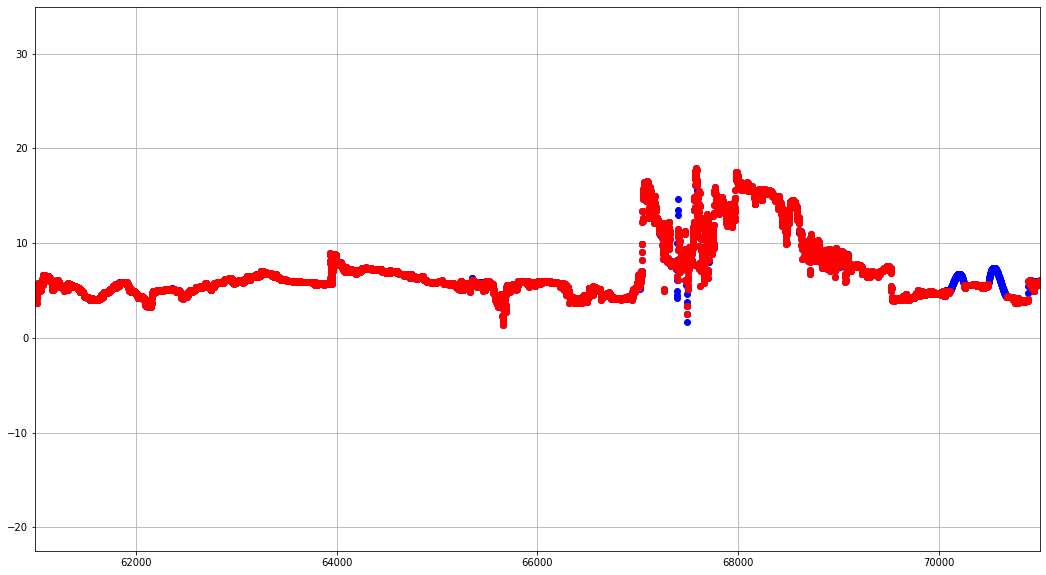

In [73]:
plt.figure(figsize=(18,10))
plt.plot(x_, y_, 'bo')
plt.plot(x, y, 'ro')
t=61000
plt.xlim((t,t+10000))
plt.grid()
# plt.savefig('/home/m/Desktop/pic.pdf', format='pdf')